In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# A look at the data

In [148]:
# Options for printing more columns when calling head for a dataframe

#pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [290]:
listings_df = pd.read_csv("./Data/listings.csv")
print(listings_df.shape)
listings_df.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [36]:
# Check for missing values in price column
listings_df["price"].isnull().mean()

0.0

In [213]:
listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [38]:
# Columns with the most missing values
most_missing_cols = listings_df.columns[listings_df.isnull().mean() > 0.75]
most_missing_cols

Index(['square_feet', 'license'], dtype='object')

In [39]:
listings_df[['square_feet', 'license']].isnull().mean()

square_feet    0.974594
license        1.000000
dtype: float64

In [214]:
# we are confortable in dropping those two columns in particular, as the number of missing values is huge
# compared to the total number of rows

In [215]:
# Check the % of missing values in other columns
# Sort by largest to smallest
listings_df.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [216]:
listings_df["neighbourhood_group_cleansed"].isnull().mean()

0.0

Since there is already an cleansed column for the neighborhood, we are confident in droping uncleansed one.

In [167]:
listings_df["experiences_offered"].unique()

array(['none'], dtype=object)

Even though "experiences_offered" seems to have no missing value, it turns out that there is no usefull information in this column. So, we will drop this column as well. 

In [291]:
#Other Variables I could drop.
listings_df.drop(["square_feet", "license", "neighbourhood", "listing_url", "scrape_id"
                 ,"last_scraped", "host_id", "host_url", "host_name", "host_since"
                 ,"host_location", "host_about", "host_thumbnail_url","host_picture_url"
                 ,"host_neighbourhood", "name", "summary", "space", "experiences_offered"
                 ,"thumbnail_url", "neighborhood_overview", "notes", "transit", "medium_url"
                 ,"picture_url", "xl_picture_url", "host_verifications", "street"
                 ,"state", "zipcode", "market", "smart_location", "country_code"
                 ,"country", "latitude", "longitude", "amenities", "security_deposit"
                 ,"cleaning_fee", "extra_people", "weekly_price", "monthly_price", "calendar_updated"
                 ,"has_availability", "calendar_last_scraped", "first_review", "last_review"
                 ,"requires_license", "jurisdiction_names", "description", "city", "host_has_profile_pic"
                 ,"require_guest_profile_picture", "require_guest_phone_verification"
                 ,"host_acceptance_rate"], axis=1, inplace=True)
listings_df.shape

(3818, 37)

In [232]:
listings_df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,241032,within a few hours,96%,100%,f,3.0,3.0,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$85.00,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,2,4.07
1,953595,within an hour,98%,100%,t,6.0,6.0,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$150.00,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,6,1.48
2,3308979,within a few hours,67%,100%,f,2.0,2.0,t,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,$975.00,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,2,1.15
3,7421966,NaN,NaN,NaN,f,1.0,1.0,t,Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,$100.00,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1,NaN
4,278830,within an hour,100%,NaN,f,2.0,2.0,t,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,$450.00,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,1,0.89


In [280]:
pd.concat([listings_df.isnull().mean().sort_values(ascending=False), listings_df.dtypes], axis=1).sort_values(by=0, ascending=False)

,0,1
review_scores_checkin,0.172342,float64
review_scores_accuracy,0.172342,float64
review_scores_value,0.171818,float64
review_scores_location,0.171556,float64
review_scores_cleanliness,0.171032,float64
review_scores_communication,0.170508,float64
review_scores_rating,0.169460,float64
reviews_per_month,0.164222,float64
host_response_rate,0.136983,float64
host_response_time,0.136983,object


In [292]:
# Fix price column - Convert it to float
listings_df["price"] = listings_df["price"].replace('[\$,]', '', regex=True).astype(float)

In [293]:
listings_df[["room_type", "property_type"]][listings_df["property_type"].isnull()]

,room_type,property_type
2184,Entire home/apt,NaN


In [294]:
listings_df["property_type"][listings_df["room_type"]=="Entire home/apt"].mode()

0    Apartment
dtype: object

In [295]:
listings_df["property_type"][listings_df["property_type"].isnull()] = "Apartment"

/Applications/Anaconda4.3.1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [296]:
listings_df[listings_df["beds"].isnull()]

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
1961,609252,within an hour,100%,f,2.0,2.0,t,Greenwood,Other neighborhoods,t,House,Private room,4,NaN,1.0,NaN,Real Bed,280.0,1,1,1125,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,2,NaN


In [297]:
listings_df["host_response_rate"] = listings_df["host_response_rate"].str.rstrip("%").astype("float") / 100.0

In [279]:
listings_df.select_dtypes(include=['O']).columns

Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [284]:
listings_df.shape

(3818, 36)

In [283]:
listings_df.dropna(axis=0).shape

(2834, 36)

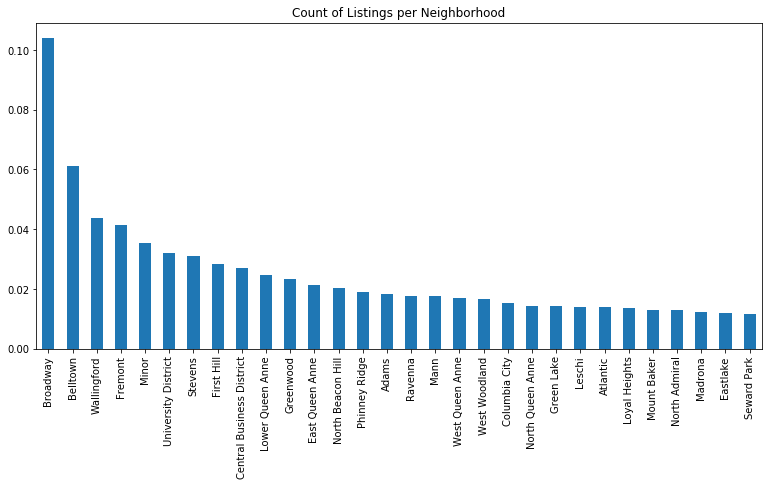

In [298]:
# Top Neighborhoods in terms of listings
top_neigh = listings_df["neighbourhood_cleansed"].value_counts()/listings_df["neighbourhood_cleansed"].value_counts().sum()

# Top 20
top_neigh[:30].plot(kind="bar", legend=None, figsize=(13,6));
plt.title("Count of Listings per Neighborhood");

In [299]:
top_neigh[:30].sum()

0.7467260345730747

In [300]:
listings_df["review_scores_location"].isnull().mean()

0.1715557883708748

In [301]:
# Average User's Ratings per Neighborhood
Avg_LocationRating_per_Neighborhood = listings_df[["neighbourhood_cleansed", "review_scores_location"]].\
    groupby(["neighbourhood_cleansed"]).mean().\
    sort_values(by="review_scores_location", ascending=False)

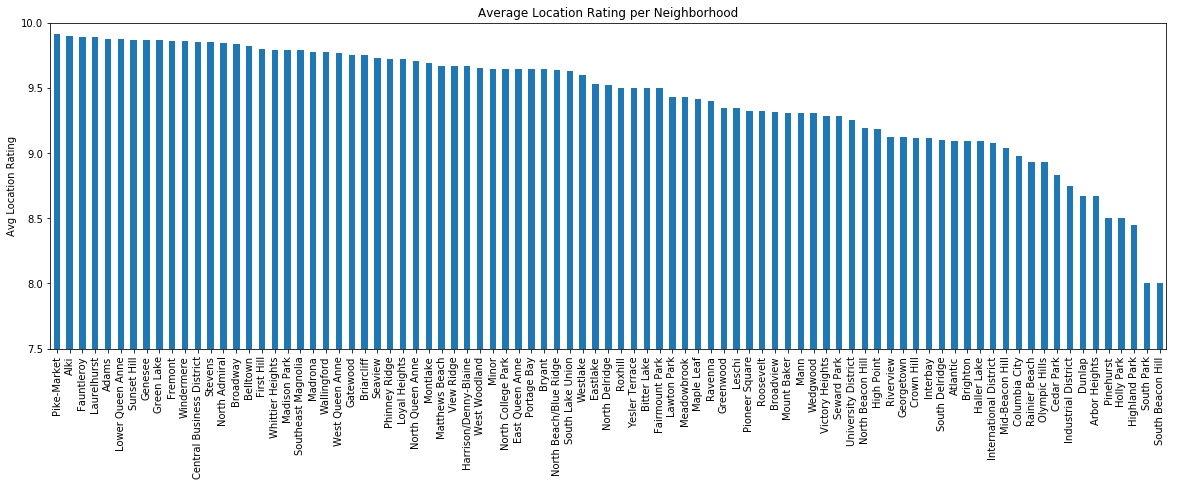

In [302]:
Avg_LocationRating_per_Neighborhood.plot(kind="bar", legend=None, figsize=(20,6));
plt.title("Average Location Rating per Neighborhood");
plt.ylim(7.5, 10);
plt.xlabel("");
plt.ylabel("Avg Location Rating");

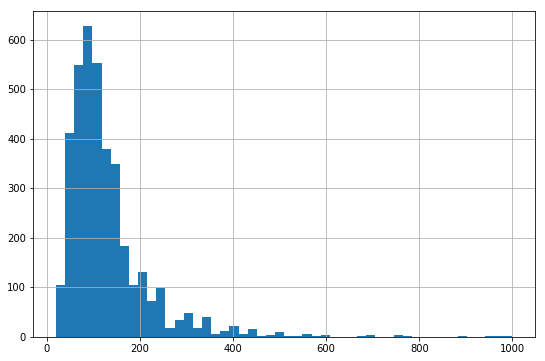

In [385]:
plt.figure(figsize=(9, 6));
listings_df["price"].hist(bins=50);

In [350]:
# Average Price per Neighborhood
Avg_Price_per_Neighborhood = listings_df[["neighbourhood_cleansed", "price"]].\
    groupby(["neighbourhood_cleansed"]).mean().\
    sort_values(by="price", ascending=False)

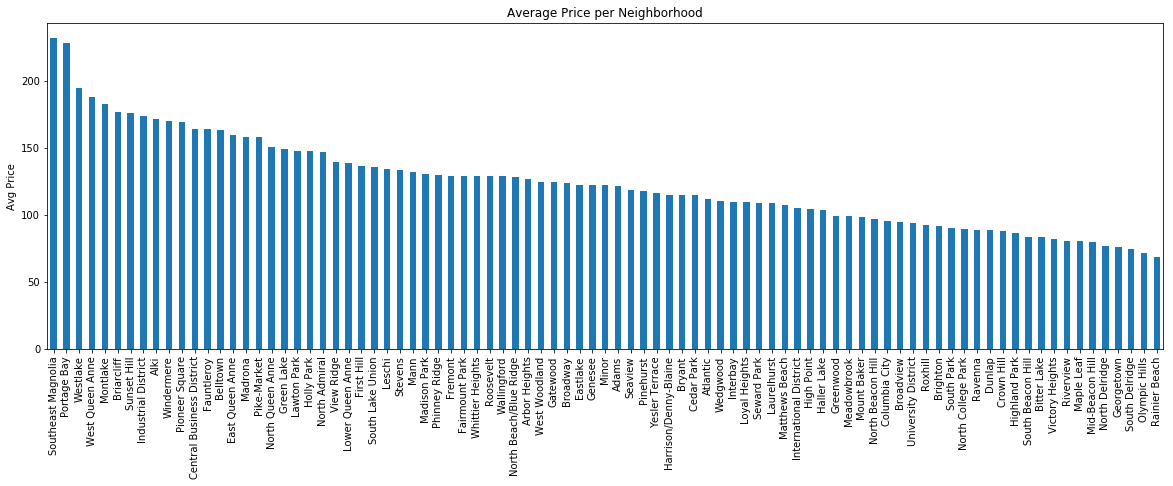

In [351]:
Avg_Price_per_Neighborhood.plot(kind="bar", legend=None, figsize=(20,6));
plt.title("Average Price per Neighborhood");
plt.xlabel("");
plt.ylabel("Avg Price");

## Questions:
 1. a. Which are the most ecxpensive and most cheap neighborhoods?
 1. b. %price difference from the overall average price per neighborhood.
 2. a. What types of properties are mostly available in Seattle?
 2. b. Does that differ by neighborhood?
 3. What factors drive the listing price most?

# Question 1

In [350]:
# Average Price per Neighborhood
Avg_Price_per_Neighborhood = listings_df[["neighbourhood_cleansed", "price"]].\
    groupby(["neighbourhood_cleansed"]).mean().\
    sort_values(by="price", ascending=False)

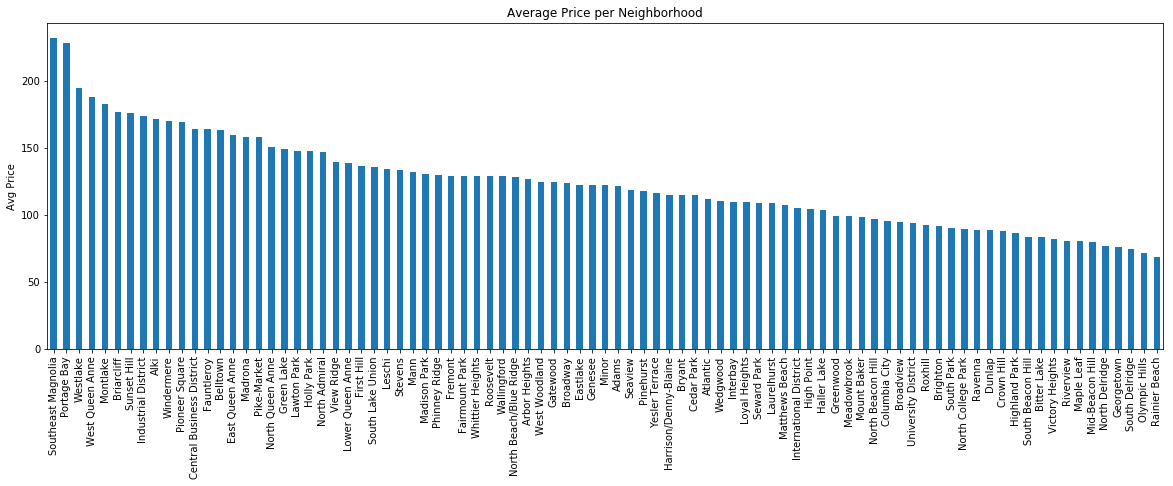

In [351]:
Avg_Price_per_Neighborhood.plot(kind="bar", legend=None, figsize=(20,6));
plt.title("Average Price per Neighborhood");
plt.xlabel("");
plt.ylabel("Avg Price");

In [352]:
Avg_Price_per_Neighborhood["%diff from Overall Avg Price"] = (Avg_Price_per_Neighborhood["price"]-listings_df["price"].mean()) / listings_df["price"].mean()
Avg_Price_per_Neighborhood

,price,%diff from Overall Avg Price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,0.810539
Portage Bay,227.857143,0.780465
Westlake,194.470588,0.519584
West Queen Anne,187.769231,0.467220
Montlake,182.789474,0.428309
Briarcliff,176.571429,0.379721
Sunset Hill,176.055556,0.375690
Industrial District,173.333333,0.354419
Alki,171.619048,0.341024


In [356]:
# Top & Bottom 10 neighborhoods
pd.concat([Avg_Price_per_Neighborhood[:10], Avg_Price_per_Neighborhood[-10:]], axis=0)

,price,%diff from Overall Avg Price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,0.810539
Portage Bay,227.857143,0.780465
Westlake,194.470588,0.519584
West Queen Anne,187.769231,0.467220
Montlake,182.789474,0.428309
Briarcliff,176.571429,0.379721
Sunset Hill,176.055556,0.375690
Industrial District,173.333333,0.354419
Alki,171.619048,0.341024


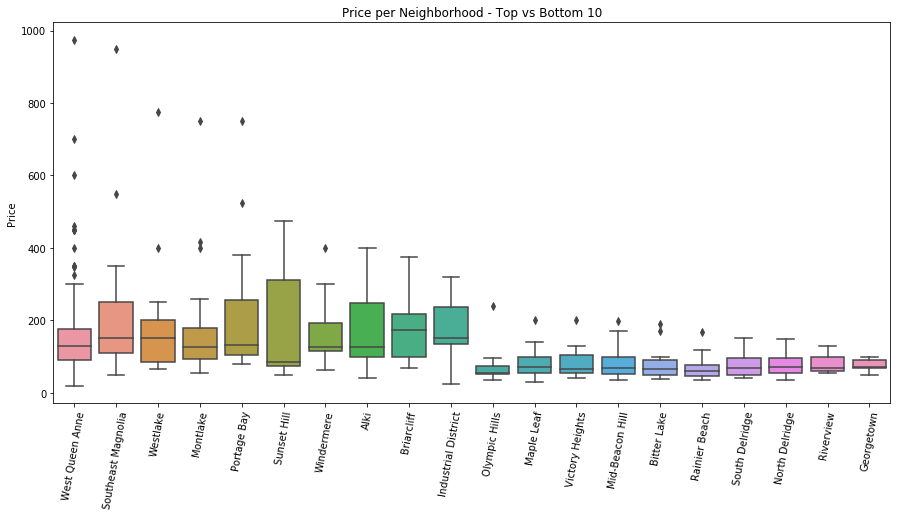

In [391]:
top_bottom = list(Avg_Price_per_Neighborhood.index[:10]) + list(Avg_Price_per_Neighborhood.index[-10:])
top_bottom_plt = listings_df[["neighbourhood_cleansed", "price"]][listings_df["neighbourhood_cleansed"].isin(top_bottom)]
top_bottom_plt = top_bottom_plt.sort_values(by=["price"], ascending=False)

plt.figure(figsize=(15, 7));
sns.boxplot(x="neighbourhood_cleansed", y="price", data=top_bottom_plt);
plt.xticks(rotation=80);
plt.title("Price per Neighborhood - Top vs Bottom 10");
plt.xlabel("");
plt.ylabel("Price");

# Question 3 - Regression and coefficients


1. Create dummies
2. drop nas
3. train test split
4. fit with normalisation
5. predict and evaluate